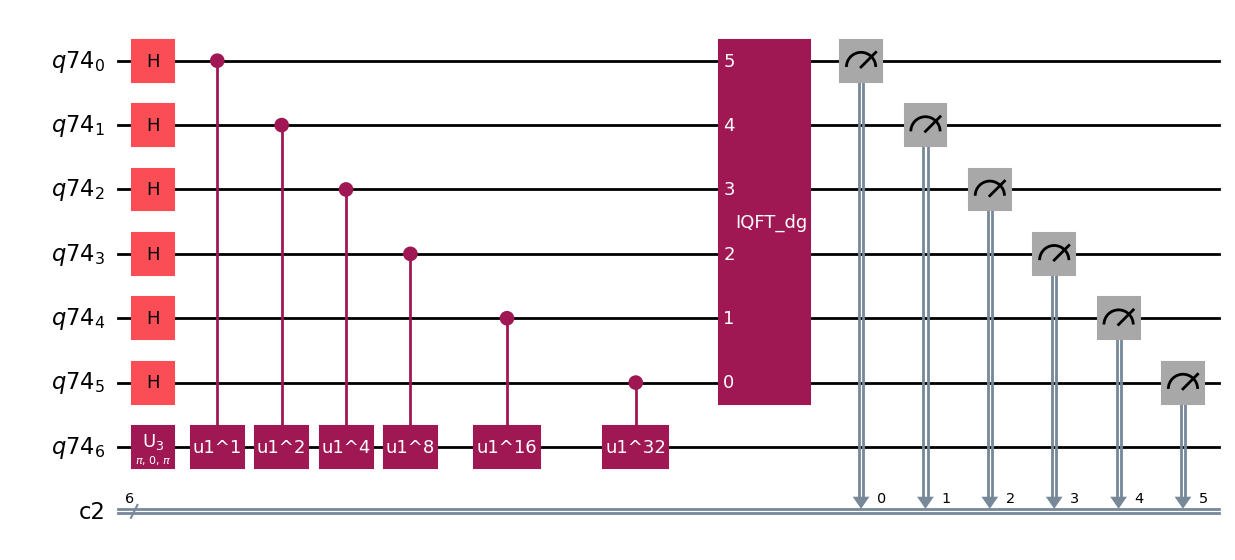

In [3]:
from qiskit.circuit.library import PhaseEstimation, U1Gate, QFT
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np

theta = 1 / 3
u = U1Gate(2 * np.pi * theta)

ancilla = 6
qreg = QuantumRegister(ancilla + 1)
creg = ClassicalRegister(ancilla)
qc = QuantumCircuit(qreg, creg)
# possible states for qubit at last index
# |1> and -|1> which are the eigenstates of U at eigenvalue e^{2*pi*i*theta}
qc.x(ancilla)  # must be an eigenstate of Unitary matrix U
# qc.z(ancilla)
pe = PhaseEstimation(ancilla, unitary=u)
qc.compose(pe, qubits=list(range(ancilla + 1)), inplace=True)

qc.measure(qreg[:ancilla], creg)

qc.decompose().draw("mpl", fold=-1)

In [2]:
# from qiskit.quantum_info import Statevector

# sv = Statevector(qc)
# sv.draw('latex')

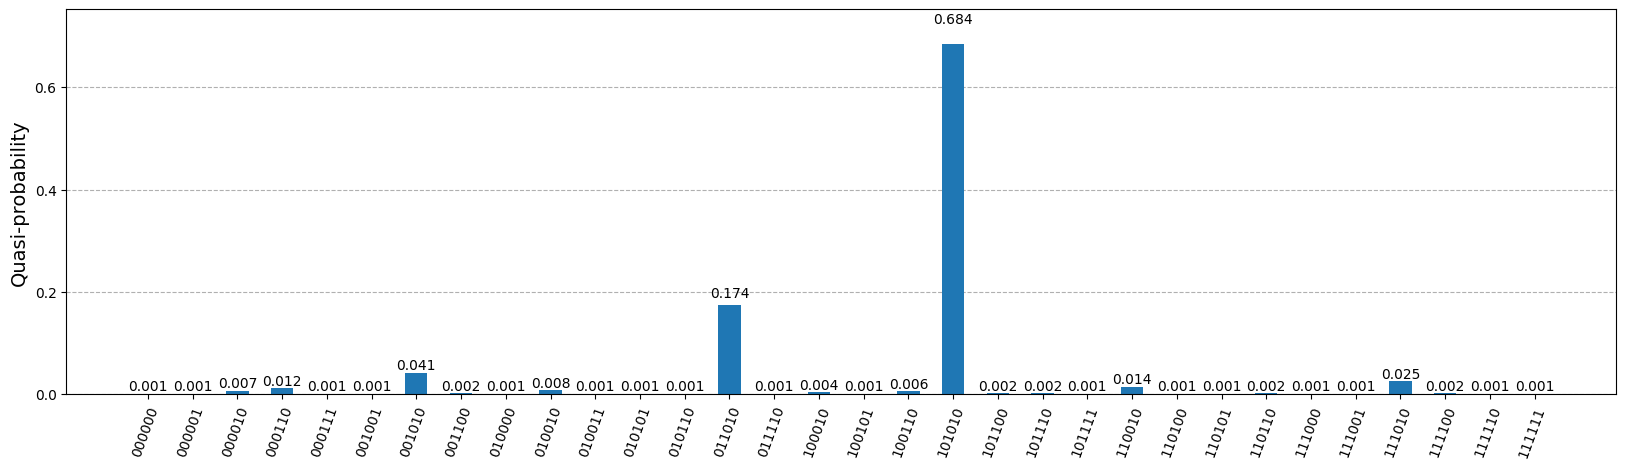

In [5]:
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_distribution


simulator = AerSimulator()
isa_circuit = transpile(qc, simulator)
result = simulator.run(isa_circuit).result()
counts = result.get_counts()
display(plot_distribution(counts, figsize=(20, 5)))

In [6]:
# phase estimation

import operator

highest_probability_outcome = max(counts.items(), key=operator.itemgetter(1))[0][::-1]
print("Highest probability outcome:", highest_probability_outcome)
measured_theta = int(highest_probability_outcome, 2) / 2**ancilla
print(
    "Using %d qubits with theta = %.5f, estimated_theta = %.5f."
    % (ancilla, theta, measured_theta)
)

Highest probability outcome: 010101
Using 6 qubits with theta = 0.33333, estimated_theta = 0.32812.
